# OPTIMIZATION METHODS IN STRUCTURAL ENGINEERS

Optimizations in structural engineering offer several advantages that can significantly enhance the design, construction, and performance of structures. Overall, optimization techniques empower structural engineers to achieve cost-effective, sustainable, and high-performing structures that meet safety requirements while maximizing resource efficiency. 


In recent years, some optimization methods that are conceptually different from the tra- ditional mathematical programming techniques have been developed such as Genetic algorithms, Simulated annealing, Particle swarm optimization, Ant colony optimization, Fuzzy optimization, Neural-network-based methods,... These methods are labeled as modern or nontraditional methods of optimization.

In this topic we will discuss two following methods:
1. Genetic algorithms
2. Neural-network-based methods

Genetic algorithms are optimization techniques inspired by the process of natural selection and genetics. They are used to find optimal solutions to complex problems by simulating the principles of evolution and genetic recombination (initialization, evaluation, selection, reproduction, replacement, termination).

Neural network-based methods, often referred to as neural networks or artificial neural networks, are computational models inspired by the structure and functioning of biological brains. They consist of interconnected nodes, called neurons, organized in layers that process and transmit information. Neural network-based methods offer several advantages, including their ability to learn complex patterns from large datasets, adaptability to different problem domains, and the potential for parallel processing. However, they may require extensive computational resources, significant training data, and careful.


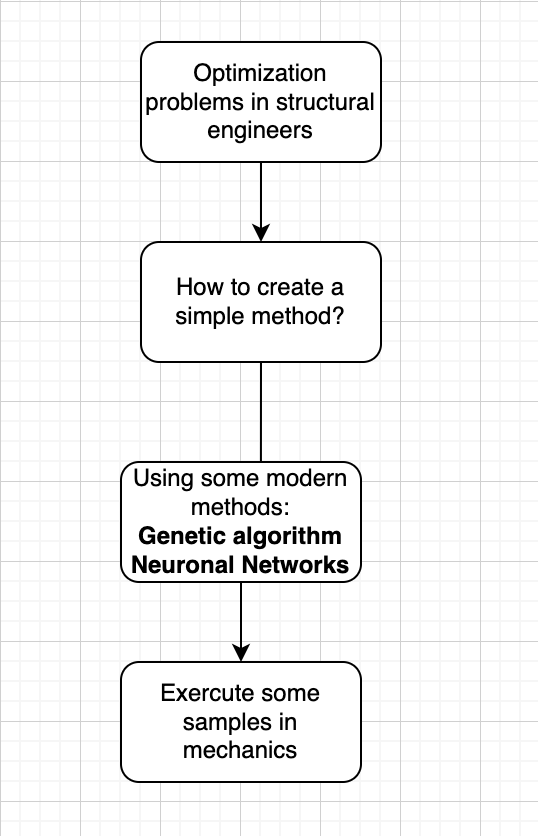


## Problems in structural engineers

The general problem in structural engineers is to find a set of variables $\bf{X}$ $=\{x_1, x_2,...,x_n\}^T$ which minimines the objective function $f(\bf{X})$ that satisfy constraints: 

    $g_1(\bf{X})$= $\alpha$
    
    $$g_2(\bf{X})\leq \beta$$
    
    $$g_3(\bf{X})\geq \eta$$



## Create a simple optimization method

In [1]:
# This is a sample Python script.
import random

# define an objective function
def OF(x,y,z):
    return 6*x**3+9*y**2+90*z-25

# fitness function (the minimum error makes the fitness function maximized)
def fitness(x,y,z):
    ans=OF(x,y,z)

    if ans==0:
        return 99999
    else:
        return abs(1/ans)

# Generate solutions: get 1000 random solutions then check which one return the minimum error 
solutions=[]
for s in range(1000):
    solutions.append((random.uniform(0,10000),
                      random.uniform(0,10000),
                      random.uniform(0,10000)))

# save the best solutions in one list    
for i in range(10000):
    ranksolutions=[]
    for s in solutions:
        ranksolutions.append((fitness(s[0],s[1],s[2]),s))
    ranksolutions.sort()
    ranksolutions.reverse()

    #print(f"=== Gen {i} best solutions ===")
    #print(ranksolutions[0])
    if ranksolutions[0][0]>9999:
        break
    # chose 100 best solutions and genberate again 
    bestsolutions=ranksolutions[:100]

    elements=[]
    for s in bestsolutions:
        elements.append(s[1][0])
        elements.append(s[1][1])
        elements.append(s[1][2])

    newGen=[]
    for _ in range(1000):
        e1=random.choice(elements)*random.uniform(0.99,1.01)
        e2 = random.choice(elements)*random.uniform(0.99,1.01)
        e3 = random.choice(elements)*random.uniform(0.99,1.01)

        newGen.append((e1,e2,e3))
    solutions=newGen



# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    print(f" The fitness value is {ranksolutions[0][0]}")
    s=ranksolutions[0][1]
    print(f"The best solution is {s}")
    ans=OF(s[0],s[1],s[2])
    print(f"The error of the method {abs(ans)}")


 The fitness value is 27218.318325407232
The best solution is (0.2748629038402722, 0.27537908113549686, 0.26881043637939217)
The error of the method 3.673996269881741e-05


## Genetic Algorithm Methods
The package was developed by Ryan Solgi:
https://pypi.org/project/geneticalgorithm/



In [2]:
#!pip install geneticalgorithm

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga


### Optimized function with constraints

Now consider that we want to minimize f(X)=x1+x2+x3 where X is a set of real variables in [0,10]. Also we have an extra constraint so that sum of x1 and x2 is equal or greater than 2. The minimum of f(X) is 2. In such a case, a trick is to define penalty function.

 The best solution found:                                                                           
 [1.52777288 0.47491239 0.00167088]

 Objective function:
 2.0043561458050974


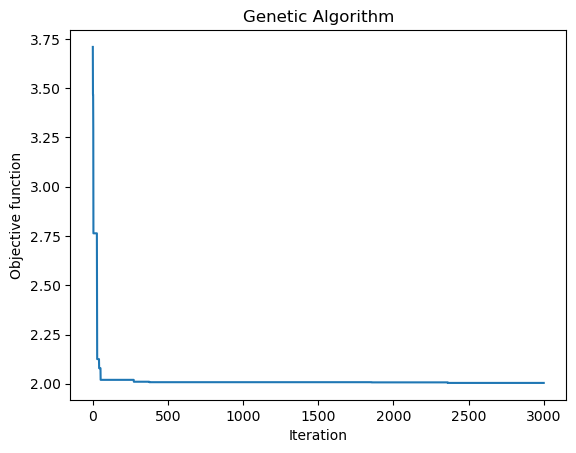

In [9]:

# Optimized function with constraints


def f(X):
    pen = 0
    if X[0] + X[1] < 2:
        pen = 30 + 1000 * (2 - X[0] - X[1])
    return np.sum(X) + pen


varbound = np.array([[0, 10]] * 3)




algorithm_param = {'max_num_iteration': 3000, \
                   'population_size': 100, \
                   'mutation_probability': 0.1, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=f, \
           dimension=3, \
           variable_type='real', \
           variable_boundaries=varbound, \
           algorithm_parameters=algorithm_param)

model.run()

http://infinity77.net/global_optimization/test_functions_nd_W.html

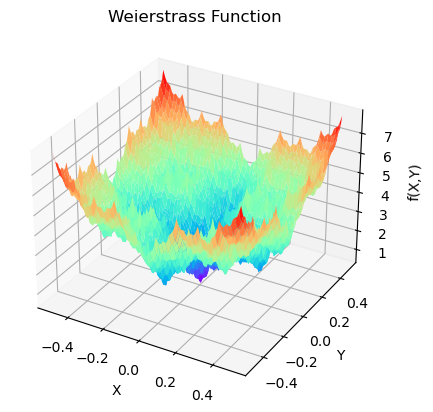

In [11]:
"""
http://infinity77.net/global_optimization/test_functions_nd_W.html
"""
#Weierstrass Function_______________________________________

def f(X):
    dim = len(X)

    a = 0.5
    b = 3
    OF = 0
    for i in range(0, dim):
        t1 = 0
        for k in range(0, 21):
            t1 += (a ** k) * math.cos((2 * math.pi * (b ** k)) * (X[i] + 0.5))
        OF += t1
    t2 = 0
    for k in range(0, 21):
        t2 += (a ** k) * math.cos(math.pi * (b ** k))
    OF -= dim * t2

    return OF


varbound = np.array([[-0.5, 0.5]] * 2)

algorithm_param = {'max_num_iteration': 1000, \
                   'population_size': 100, \
                   'mutation_probability': 0.1, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=f, dimension=2, \
           variable_type='real', \
           variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)


#Plot
# Generate data points
x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        Z[i][j] = f([X[i][j], Y[i][j]])

# Plot the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='rainbow')


# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')
ax.set_title('Weierstrass Function')

# Show the plot
plt.show()




 The best solution found:                                                                           
 [-6.27441834e-07 -5.23867987e-06]

 Objective function:
 0.002874565076567137


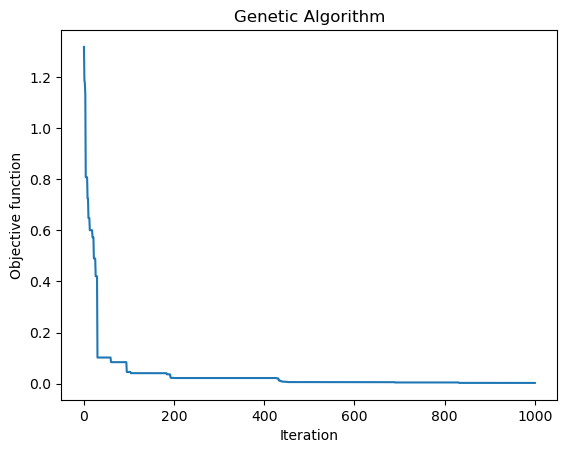

In [6]:
model.run()

 The best solution found:                                                                           
 [2.00077009 0.20003598]

 Objective function:
 7.931759511885977


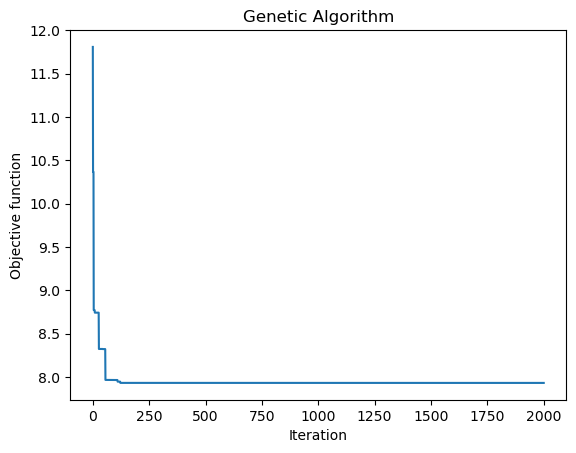

Optimization Result:
x1 = 2.000770089433655
x2 = 0.20003597786641203
Objective Function Value = 7.931759511885977


In [23]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

# Define the constants and bounds
sigma_u = 20
sigma_l = -15

P = 20
E = 1

# Define the Constraint Functions
def constraint_1(X):
    x1, x2 = X
    return 2500/(np.pi*x1*x2)-500

def constraint_2(X):
    x1, x2 = X
    return 2500/(np.pi*x1*x2)-np.pi**2*(x1**2+x2**2)/0.5882


# Define the Objective Function
def OF(X):
    x1, x2 = X
    pen=0
    if constraint_1(X)<=0 and constraint_2(X)<=0  :
        pen= 500- 1000*constraint_1(X)-1000*constraint_2(X)
    return 9.82*x1 * x2+2*x1 + pen




# Define the optimization problem
varbound = np.array([[2, 14], [0.2, 0.8]])

algorithm_param = {'max_num_iteration': 2000, \
                   'population_size': 200, \
                   'mutation_probability': 0.1, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=OF, dimension=2, variable_type='real', variable_boundaries=varbound,algorithm_parameters=algorithm_param)

# Define the constraints
#model.constraints = [
 #   {'name': 'constraint_1', 'constraint': constraint_1, 'type': 'ineq'},
  #  {'name': 'constraint_2', 'constraint': constraint_2, 'type': 'ineq'},
   # {'name': 'constraint_3', 'constraint': constraint_3, 'type': 'ineq'}
#]


# Run the genetic algorithm optimization
model.run()

# Print the optimization result
print("Optimization Result:")
print("x1 =", model.best_variable[0])
print("x2 =", model.best_variable[1])
print("Objective Function Value =", model.best_function)

In [24]:
constraint_1()

NameError: name 'x1' is not defined